<a href="https://colab.research.google.com/github/NathanKelly1/DataAnalysisProject/blob/main/Has_COVID_changed_air_travel_in_a_substantual_way_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("flightdata.csv")

While studying data analysis we have been shown by our lectuers different libaries we can use to manipulate and clean dataframes. You can see above that I have imported Numpy and Pandas. Numpy is a Linear Algebra Library for Python. Pandas is built on top of Numpy. It provides high-performing and easy to use data structures. I also imported the datafile from https://data.gov.ie/dataset/tam08-passengers-handled-by-main-airports.

In [ ]:
 df

,STATISTIC,Statistic Label,TLIST(M1),Month,C02935V03550,Airport,UNIT,VALUE
0,TAM08C01,Passengers,201901,2019 January,EIDW,Dublin,Number,2054794.0
1,TAM08C01,Passengers,201901,2019 January,EICK,Cork,Number,148939.0
2,TAM08C01,Passengers,201901,2019 January,EINN,Shannon,Number,87016.0
3,TAM08C01,Passengers,201901,2019 January,EIKN,Knock,Number,42413.0
4,TAM08C01,Passengers,201901,2019 January,EIKY,Kerry,Number,20829.0
...,...,...,...,...,...,...,...,...
331,TAM08C01,Passengers,202308,2023 August,EICK,Cork,Number,307117.0
332,TAM08C01,Passengers,202308,2023 August,EINN,Shannon,Number,NaN
333,TAM08C01,Passengers,202308,2023 August,EIKN,Knock,Number,101736.0
334,TAM08C01,Passengers,202308,2023 August,EIKY,Kerry,Number,NaN


After looking through data by calling the dataframe "df", We can see that there are columns of irrelevence. The "STATISTIC" column represnted the offical name of the dataset.

The column "TLIST(M1)" represent the year and date in an int form. We didnt need this column as we had another column to represnt the year and date in the "Month" column.

The column called "C02935V03550" represented the Codes for each airport. For example EICK represnted Cork. Since there was already another column for the name of the Airport called "Airport" we didnt see a need for a column for that represented the same information just in a different format.

The "Number" column seemed irrelevant as there was a column there called "VALUE" that had integers inside the column.

As you can see bellow, we used the pandas function drop() to drop the irrelevant columns.




In [ ]:
updated = df.drop(columns=['STATISTIC', 'TLIST(M1)', 'C02935V03550', 'UNIT'])
updated.to_csv('flightdataupdated.csv', index=False)

With this cleaning of data, we needed somewhere to put the cleaned data.
We created a variable called updated. This equaled to the dataframe with the dropped columns. To save our newly updated dataframe, updated was read to a csv file called "flightdataupdated.csv'.


In [ ]:
df["VALUE"].isna().value_counts()

False    331
True       5
Name: VALUE, dtype: int64

In [ ]:
updated

,Statistic Label,Month,Airport,VALUE
0,Passengers,2019 January,Dublin,2054794.0
1,Passengers,2019 January,Cork,148939.0
2,Passengers,2019 January,Shannon,87016.0
3,Passengers,2019 January,Knock,42413.0
4,Passengers,2019 January,Kerry,20829.0
...,...,...,...,...
331,Passengers,2023 August,Cork,307117.0
332,Passengers,2023 August,Shannon,NaN
333,Passengers,2023 August,Knock,101736.0
334,Passengers,2023 August,Kerry,NaN


In [ ]:
updated.describe()

,VALUE
count,3.310000e+02
mean,6.659143e+05
std,1.108293e+06
min,0.000000e+00
25%,2.542650e+04
50%,9.221300e+04
75%,4.309540e+05
max,4.040594e+06


In this dataframe, some airports had no values. These no values were represented as NaN. NaN stands for "Not a Number". This would affect our calculations of mean and standard deviation. To do away with this problem we used the pandas funtion .fillna(). The reason that some airports didn't have a number for certain numbers is because they were either closed during the months of the COVID-19 pandemic.Another reason is because this dataset was released at the end of September 2023 and some aiports didn't have their data in time to represented on this dataset.

In [ ]:
updated.fillna(0)

,Statistic Label,Month,Airport,VALUE
0,Passengers,2019 January,Dublin,2054794.0
1,Passengers,2019 January,Cork,148939.0
2,Passengers,2019 January,Shannon,87016.0
3,Passengers,2019 January,Knock,42413.0
4,Passengers,2019 January,Kerry,20829.0
...,...,...,...,...
331,Passengers,2023 August,Cork,307117.0
332,Passengers,2023 August,Shannon,0.0
333,Passengers,2023 August,Knock,101736.0
334,Passengers,2023 August,Kerry,0.0


In [ ]:
Aiport = updated.groupby('Airport')
dublinfile = Aiport.get_group('Dublin')
dublinfile.reset_index()

,index,Statistic Label,Month,Airport,VALUE
0,0,Passengers,2019 January,Dublin,2054794.0
1,6,Passengers,2019 February,Dublin,1993325.0
2,12,Passengers,2019 March,Dublin,2432195.0
3,18,Passengers,2019 April,Dublin,2789660.0
4,24,Passengers,2019 May,Dublin,2965517.0
5,30,Passengers,2019 June,Dublin,3202409.0
6,36,Passengers,2019 July,Dublin,3430859.0
7,42,Passengers,2019 August,Dublin,3399714.0
8,48,Passengers,2019 September,Dublin,3021796.0
9,54,Passengers,2019 October,Dublin,2865397.0


In [ ]:

dublinfile.to_csv('DublinInfo.csv')


In [ ]:

Corkfile = Aiport.get_group('Cork')
Corkfile.reset_index()

,index,Statistic Label,Month,Airport,VALUE
0,1,Passengers,2019 January,Cork,148939.0
1,7,Passengers,2019 February,Cork,150482.0
2,13,Passengers,2019 March,Cork,174876.0
3,19,Passengers,2019 April,Cork,210510.0
4,25,Passengers,2019 May,Cork,239077.0
5,31,Passengers,2019 June,Cork,278961.0
6,37,Passengers,2019 July,Cork,296876.0
7,43,Passengers,2019 August,Cork,296799.0
8,49,Passengers,2019 September,Cork,238523.0
9,55,Passengers,2019 October,Cork,215482.0


In [ ]:
Corkfile.to_csv('CorkInfo.csv', index = False)

In [ ]:
Shannonfile = Aiport.get_group('Shannon')
Shannonfile.reset_index()

,index,Statistic Label,Month,Airport,VALUE
0,2,Passengers,2019 January,Shannon,87016.0
1,8,Passengers,2019 February,Shannon,82497.0
2,14,Passengers,2019 March,Shannon,100374.0
3,20,Passengers,2019 April,Shannon,128840.0
4,26,Passengers,2019 May,Shannon,160902.0
5,32,Passengers,2019 June,Shannon,178680.0
6,38,Passengers,2019 July,Shannon,183398.0
7,44,Passengers,2019 August,Shannon,187029.0
8,50,Passengers,2019 September,Shannon,166270.0
9,56,Passengers,2019 October,Shannon,138218.0


In [ ]:
Shannonfile.to_csv('ShannonInfo.csv', index = False)

In [ ]:
Kerryfile = Aiport.get_group('Kerry')
Kerryfile.reset_index()

,index,Statistic Label,Month,Airport,VALUE
0,4,Passengers,2019 January,Kerry,20829.0
1,10,Passengers,2019 February,Kerry,22231.0
2,16,Passengers,2019 March,Kerry,25546.0
3,22,Passengers,2019 April,Kerry,32171.0
4,28,Passengers,2019 May,Kerry,34213.0
5,34,Passengers,2019 June,Kerry,36150.0
6,40,Passengers,2019 July,Kerry,40680.0
7,46,Passengers,2019 August,Kerry,39617.0
8,52,Passengers,2019 September,Kerry,35721.0
9,58,Passengers,2019 October,Kerry,31790.0


In [ ]:
Kerryfile.to_csv('KerryInfo.csv', index = False)

In [ ]:
Knockfile = Aiport.get_group('Knock')
Knockfile.reset_index()

,index,Statistic Label,Month,Airport,VALUE
0,3,Passengers,2019 January,Knock,42413.0
1,9,Passengers,2019 February,Knock,45456.0
2,15,Passengers,2019 March,Knock,54700.0
3,21,Passengers,2019 April,Knock,71563.0
4,27,Passengers,2019 May,Knock,73850.0
5,33,Passengers,2019 June,Knock,77020.0
6,39,Passengers,2019 July,Knock,88781.0
7,45,Passengers,2019 August,Knock,94907.0
8,51,Passengers,2019 September,Knock,76300.0
9,57,Passengers,2019 October,Knock,72299.0


In [ ]:
Knockfile.to_csv('KnockInfo.csv', index = False)

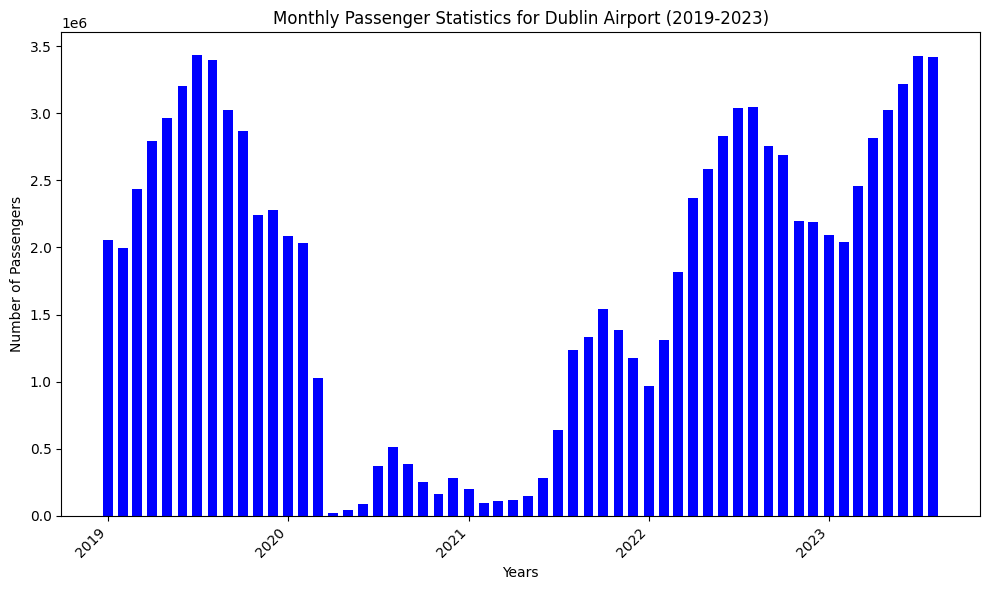

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('DublinInfo.csv')
df['Month'] = pd.to_datetime(df['Month'])
months = df['Month']
passenger_values = df['VALUE']
plt.figure(figsize=(10, 6))
plt.bar(months, passenger_values, color='blue', width=20)
plt.xlabel('Years')
plt.ylabel('Number of Passengers')
plt.title('Monthly Passenger Statistics for Dublin Airport (2019-2023)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

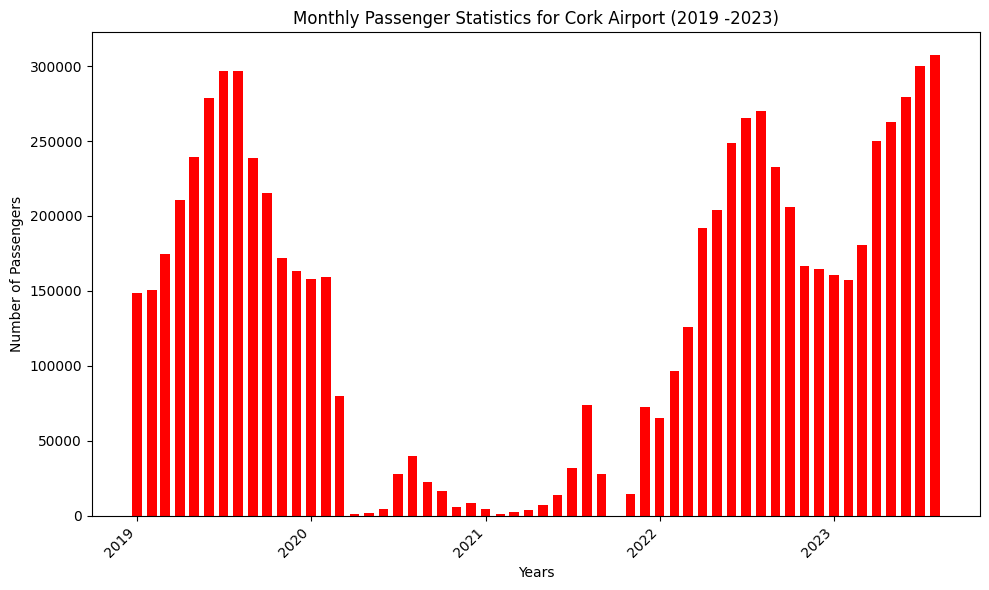

In [ ]:


df = pd.read_csv('CorkInfo.csv')
df['Month'] = pd.to_datetime(df['Month'])
months = df['Month']
passenger_values = df['VALUE']
plt.figure(figsize=(10, 6))
plt.bar(months, passenger_values, color='red', width=20)
plt.xlabel('Years')
plt.ylabel('Number of Passengers')
plt.title('Monthly Passenger Statistics for Cork Airport (2019 -2023)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

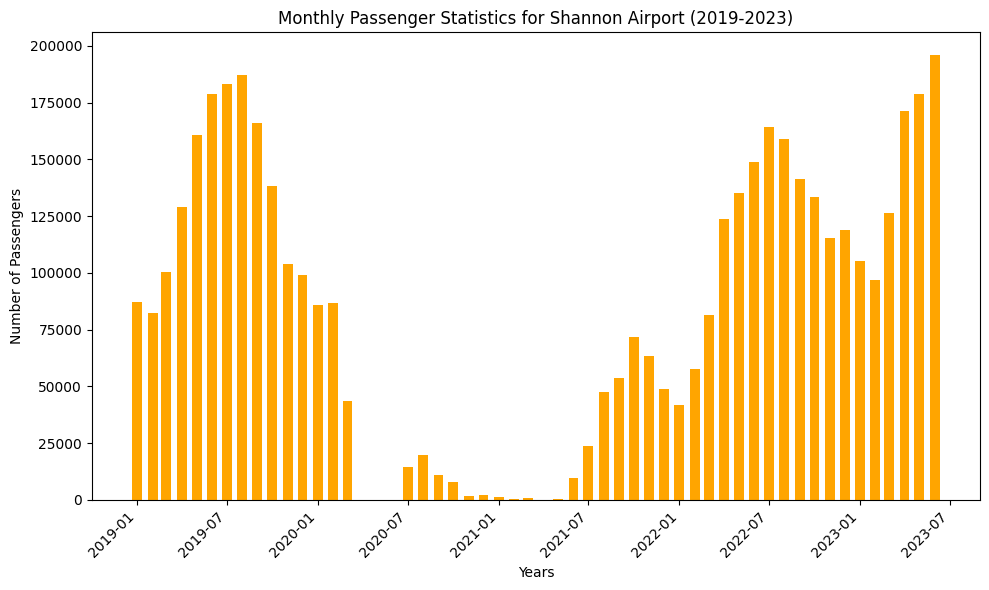

In [ ]:
df = pd.read_csv('ShannonInfo.csv')
df['Month'] = pd.to_datetime(df['Month'])
months = df['Month']
passenger_values = df['VALUE']
plt.figure(figsize=(10, 6))
plt.bar(months, passenger_values, color='orange', width=20)
plt.xlabel('Years')
plt.ylabel('Number of Passengers')
plt.title('Monthly Passenger Statistics for Shannon Airport (2019-2023)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

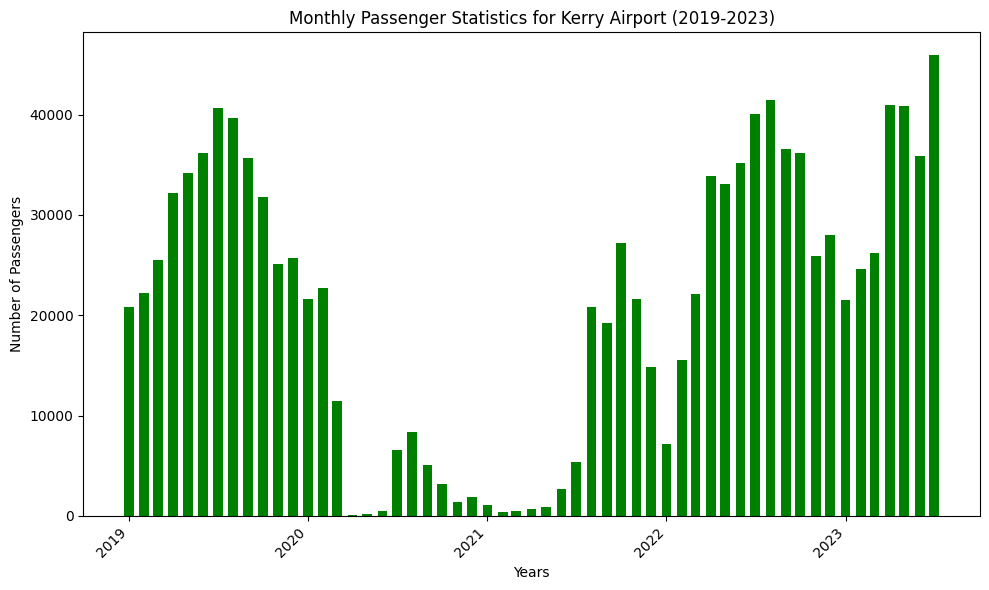

In [ ]:

df = pd.read_csv('KerryInfo.csv')
df['Month'] = pd.to_datetime(df['Month'])
months = df['Month']
passenger_values = df['VALUE']
plt.figure(figsize=(10, 6))
plt.bar(months, passenger_values, color='green', width=20)
plt.xlabel('Years')
plt.ylabel('Number of Passengers')
plt.title('Monthly Passenger Statistics for Kerry Airport (2019-2023)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

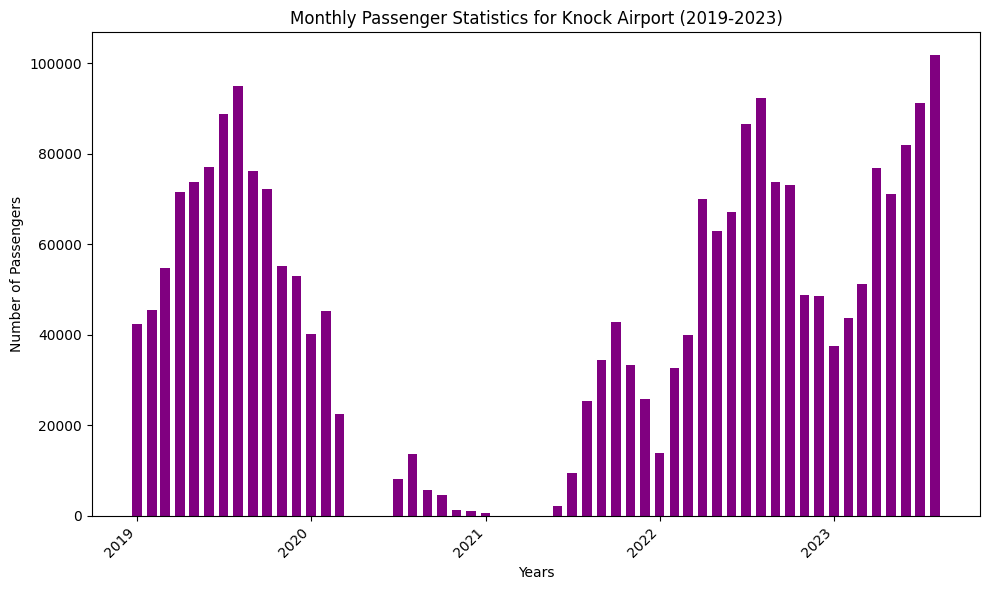

In [ ]:

df = pd.read_csv('KnockInfo.csv')
df['Month'] = pd.to_datetime(df['Month'])
months = df['Month']
passenger_values = df['VALUE']
plt.figure(figsize=(10, 6))
plt.bar(months, passenger_values, color='purple', width=20)
plt.xlabel('Years')
plt.ylabel('Number of Passengers')
plt.title('Monthly Passenger Statistics for Knock Airport (2019-2023)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mean for the all main airports Before , during and after covid.


This Mean from the period before covid from January 2019 to March 2020

In [ ]:
dublin2019 = dublinfile['VALUE']
dublin2019Mean = dublin2019.iloc[[0, 1 , 2, 3, 4,5 ,6, 7 , 8, 9 , 10 , 11 , 12, 13,14]]
dublin2019Mean.mean()

2521025.2666666666

In [ ]:
cork2019 = Corkfile['VALUE']
cork2019Mean = cork2019.iloc[[0,1 , 2, 3, 4,5 ,6, 7 , 8, 9 , 10 , 11 , 12, 13,14]]
cork2019Mean.mean()

198856.86666666667

In [ ]:
shannon2019 = Shannonfile['VALUE']
shannon2019Mean = shannon2019.iloc[[0,1 , 2, 3, 4,5 ,6, 7 , 8, 9 , 10 , 11 , 12, 13,14]]
shannon2019Mean.mean()

122176.66666666667

In [ ]:
Kerry2019 = Kerryfile['VALUE']
kerry2019Mean = Kerry2019.iloc[[0,1 , 2, 3, 4,5 ,6, 7 , 8, 9 , 10 , 11 , 12, 13,14]]
kerry2019Mean.mean()

28373.266666666666

In [ ]:
knock2019 = Knockfile['VALUE']
knock2019Mean = knock2019.iloc[[0,1 , 2, 3, 4,5 ,6, 7 , 8, 9 , 10 , 11 , 12, 13,14]]
knock2019Mean.mean()

60894.26666666667

In [ ]:
dublinduring = dublinfile['VALUE']
dublinDuringMean = dublinduring.iloc[[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
dublinDuringMean.mean()

412326.8947368421

In [ ]:
corkduring = Corkfile['VALUE']
corkDuringMean = corkduring.iloc[[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
corkDuringMean.mean()

15647.0

In [ ]:
shannonduring = Shannonfile['VALUE']
shannonDuringMean = shannonduring.iloc[[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
shannonDuringMean.mean()

14077.052631578947

In [ ]:
kerryduring = Kerryfile['VALUE']
kerryDuringMean = kerryduring.iloc[[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
kerryDuringMean.mean()

5586.315789473684

In [ ]:
knockduring = Knockfile['VALUE']
knockDuringMean = knockduring.iloc[[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
knockDuringMean.mean()

7860.263157894737

In [ ]:
dublinrecovery = dublinfile['VALUE']
dublinrecoveryMean = dublinrecovery.iloc[[34, 35, 36, 37, 38, 39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55]]
dublinrecoveryMean.mean()

2402066.0

In [ ]:
corkrecovery = Corkfile['VALUE']
corkrecoveryMean = corkrecovery.iloc[[34, 35, 36, 37, 38, 39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55]]
corkrecoveryMean.mean()

191986.77272727274

In [ ]:
shannonrecovery = Shannonfile['VALUE']
shannonrecoveryMean = shannonrecovery.iloc[[34, 35, 36, 37, 38, 39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55]]
shannonrecoveryMean.mean()

120463.9

In [ ]:
kerryrecovery = Kerryfile['VALUE']
kerryrecoveryMean = kerryrecovery.iloc[[34, 35, 36, 37, 38, 39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55]]
kerryrecoveryMean.mean()

29874.0

In [ ]:
knockrecovery = Knockfile['VALUE']
knockrecoveryMean = knockrecovery.iloc[[34, 35, 36, 37, 38, 39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55]]
knockrecoveryMean.mean()

60198.86363636364

In [ ]:
updated['Year'] = updated['Month'].str.extract(r'(\d{4})')


dublin_data = updated[(updated['Airport'] == 'Dublin') & (updated['Statistic Label'] == 'Passengers')]


std_dev_by_year = dublin_data.groupby('Year')['VALUE'].std().reset_index()


print("The stanadrd deviation for Dublin between 2019 - 2023 \n" , std_dev_by_year)

The stanadrd deviation for Dublin between 2019 - 2023 
    Year          VALUE
0  2019  509380.190608
1  2020  728815.455962
2  2021  592722.480715
3  2022  662092.635255
4  2023  560428.555988


In [ ]:
updated['Year'] = updated['Month'].str.extract(r'(\d{4})')


cork_data = updated[(updated['Airport'] == 'Cork') & (updated['Statistic Label'] == 'Passengers')]


std_dev_by_year = cork_data.groupby('Year')['VALUE'].std().reset_index()


print("The stanadrd deviation for Cork between 2019 - 2023 \n" , std_dev_by_year)

The stanadrd deviation for Cork between 2019 - 2023 
    Year         VALUE
0  2019  55042.983692
1  2020  57907.816717
2  2021  26257.852854
3  2022  65477.041749
4  2023  61943.069680


In [ ]:
updated['Year'] = updated['Month'].str.extract(r'(\d{4})')


shannon_data = updated[(updated['Airport'] == 'Shannon') & (updated['Statistic Label'] == 'Passengers')]


std_dev_by_year = shannon_data.groupby('Year')['VALUE'].std().reset_index()


print("The stanadrd deviation for Shannon between 2019 - 2023 \n" , std_dev_by_year)

The stanadrd deviation for Shannon between 2019 - 2023 
    Year         VALUE
0  2019  39491.683794
1  2020  32140.418071
2  2021  28236.731735
3  2022  38916.422650
4  2023  41711.393276


In [ ]:
updated['Year'] = updated['Month'].str.extract(r'(\d{4})')


kerry_data = updated[(updated['Airport'] == 'Kerry') & (updated['Statistic Label'] == 'Passengers')]


std_dev_by_year = kerry_data.groupby('Year')['VALUE'].std().reset_index()


print("The stanadrd deviation for Kerry between 2019 - 2023 \n" , std_dev_by_year)

The stanadrd deviation for Kerry between 2019 - 2023 
    Year         VALUE
0  2019   6746.679902
1  2020   7938.012198
2  2021  10273.225062
3  2022  10335.850912
4  2023   9516.537105


In [ ]:
updated['Year'] = updated['Month'].str.extract(r'(\d{4})')


knock_data = updated[(updated['Airport'] == 'Knock') & (updated['Statistic Label'] == 'Passengers')]


std_dev_by_year = knock_data.groupby('Year')['VALUE'].std().reset_index()


print("The stanadrd deviation for knock between 2019 - 2023 \n" , std_dev_by_year)

The stanadrd deviation for knock between 2019 - 2023 
    Year         VALUE
0  2019  16767.094642
1  2020  15930.348277
2  2021  16565.455048
3  2022  22960.149561
4  2023  23088.000928


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

df = pd.read_csv('flightdataupdated.csv')

In [ ]:
df.head()

,Statistic Label,Month,Airport,VALUE,Year
0,Passengers,2019 January,Dublin,2054794.0,2019
1,Passengers,2019 January,Cork,148939.0,2019
2,Passengers,2019 January,Shannon,87016.0,2019
3,Passengers,2019 January,Knock,42413.0,2019
4,Passengers,2019 January,Kerry,20829.0,2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  280 non-null    object 
 1   Month            280 non-null    object 
 2   Airport          280 non-null    object 
 3   VALUE            277 non-null    float64
 4   Year             280 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 11.1+ KB


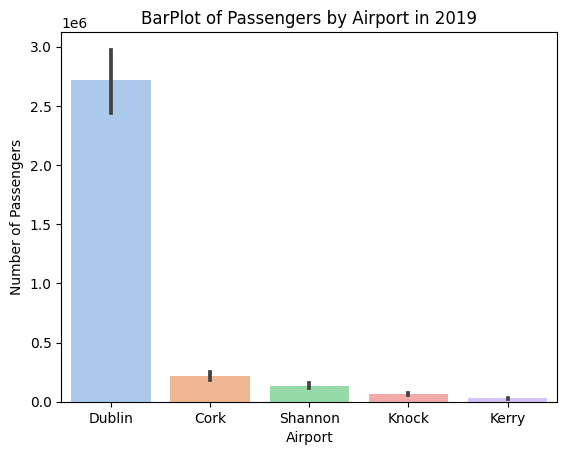

In [ ]:
data_2019 = df[df['Year'] == 2019]
sns.barplot(x='Airport', y='VALUE', data=data_2019, palette='pastel')
plt.title('BarPlot of Passengers by Airport in 2019')
plt.xlabel('Airport')
plt.ylabel('Number of Passengers')
plt.show()

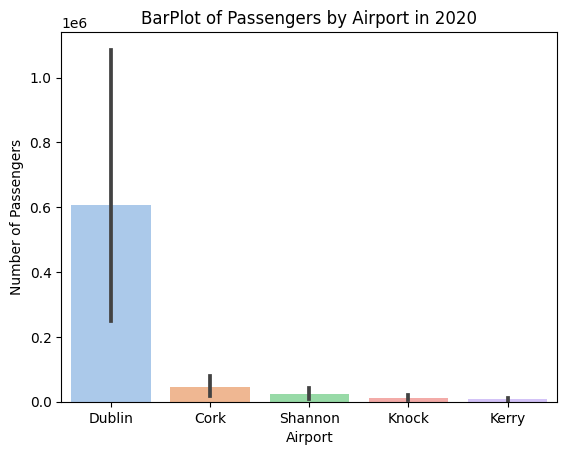

In [ ]:
data_2020 = df[df['Year'] == 2020]
sns.barplot(x='Airport', y='VALUE', data=data_2020, palette='pastel')
plt.title('BarPlot of Passengers by Airport in 2020')
plt.xlabel('Airport')
plt.ylabel('Number of Passengers')
plt.show()

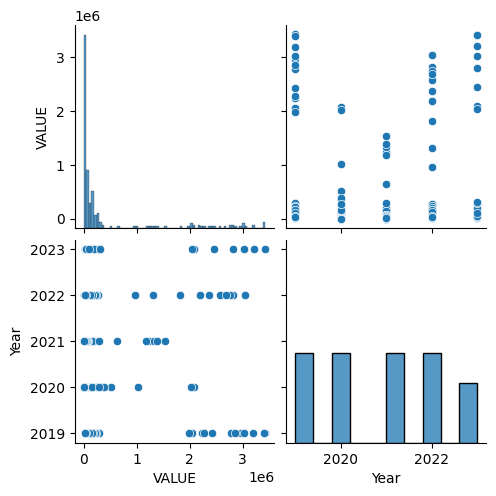

In [ ]:
df['Year'] = df['Year'].astype(int)
sns.pairplot(df)

<ipython-input-64-13180aa7b7f2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['VALUE'])


<Axes: xlabel='VALUE', ylabel='Density'>

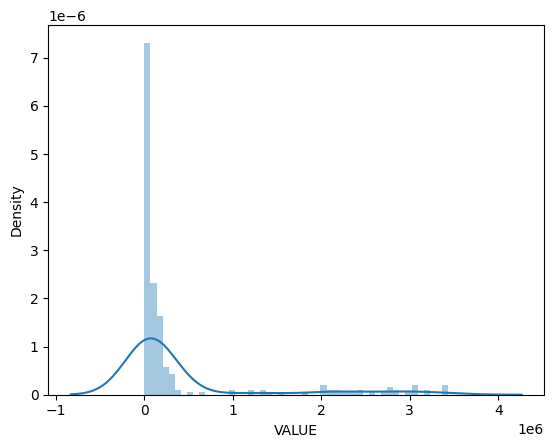

In [ ]:
sns.distplot(df['VALUE'])

<Axes: xlabel='VALUE', ylabel='Count'>

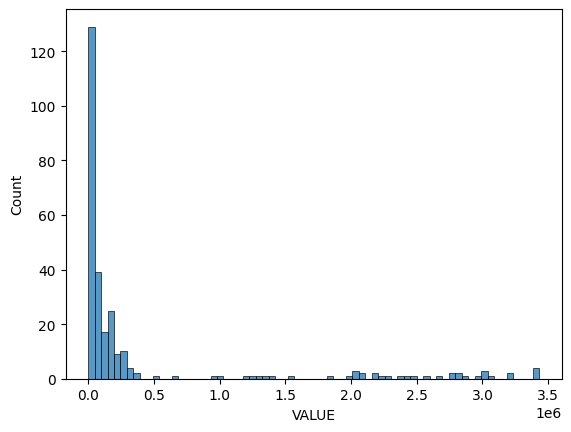

In [ ]:
sns.histplot(df['VALUE'])

In [ ]:
df.head()

,Statistic Label,Month,Airport,VALUE,Year
0,Passengers,2019 January,Dublin,2054794.0,2019
1,Passengers,2019 January,Cork,148939.0,2019
2,Passengers,2019 January,Shannon,87016.0,2019
3,Passengers,2019 January,Knock,42413.0,2019
4,Passengers,2019 January,Kerry,20829.0,2019


In [ ]:
characters_to_remove = ['2019', '2020', '2021', '2022', '2023']
remove_pattern = '|'.join(map(re.escape, characters_to_remove))

df['Month_modified'] = df['Month'].str.replace(remove_pattern, '')


<ipython-input-84-170fb574033f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Month_modified'] = df['Month'].str.replace(remove_pattern, '')


In [ ]:
df.head()

,Statistic Label,Month,Airport,VALUE,Year,Month_modified
0,Passengers,2019 January,Dublin,2054794.0,2019,January
1,Passengers,2019 January,Cork,148939.0,2019,January
2,Passengers,2019 January,Shannon,87016.0,2019,January
3,Passengers,2019 January,Knock,42413.0,2019,January
4,Passengers,2019 January,Kerry,20829.0,2019,January


In [ ]:
ft= df.pivot_table(values='VALUE', index='Month_modified',columns='Year')

<Axes: xlabel='Year', ylabel='Month_modified'>

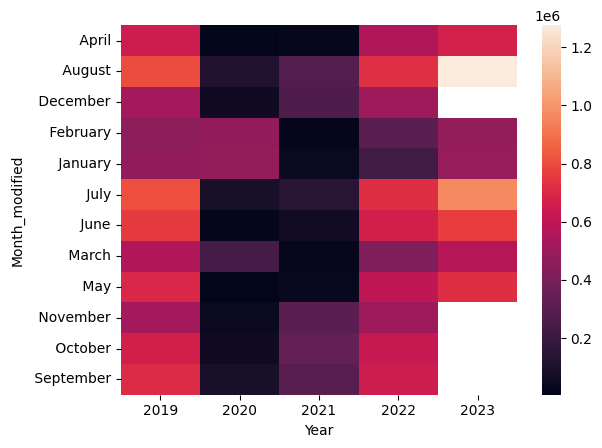

In [ ]:
sns.heatmap(ft)

In [ ]:
X = df[['Year']]
y = df['VALUE'].fillna(0.0)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

# **Model Evaluation**





In [ ]:
print(lm.intercept_)

-46562659.26537304


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Year,23220.996603


Graphs for the flightsupdated csv file


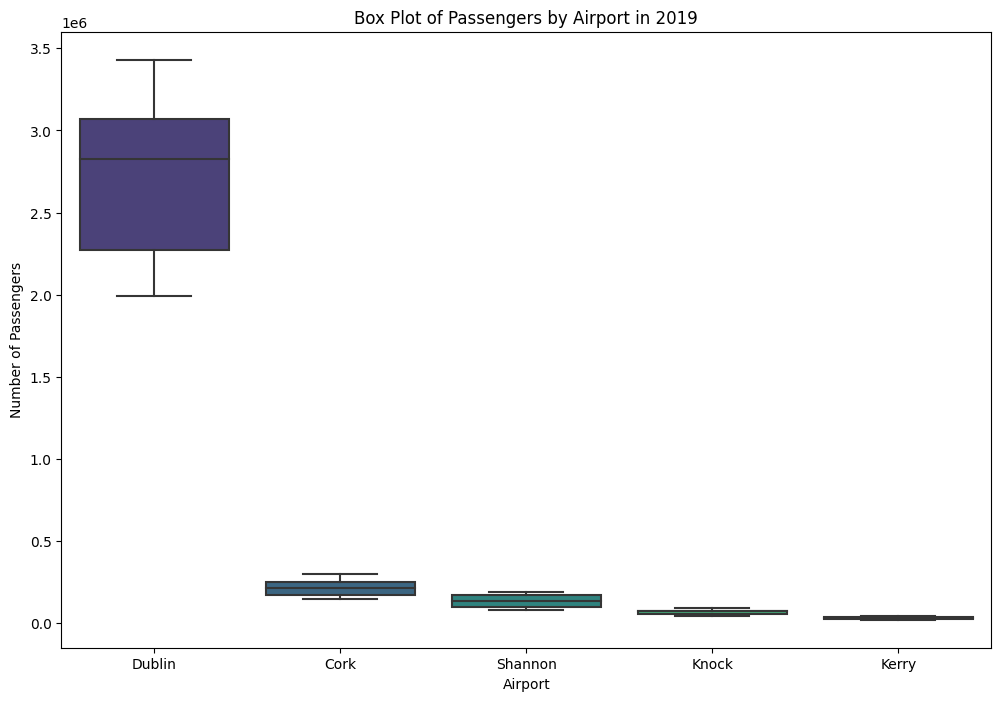

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('flightdataupdated.csv')

data_2019 = df[df['Year'] == 2019]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Airport', y='VALUE', data=data_2019, palette='viridis')
plt.title('Box Plot of Passengers by Airport in 2019')
plt.xlabel('Airport')
plt.ylabel('Number of Passengers')
plt.show()


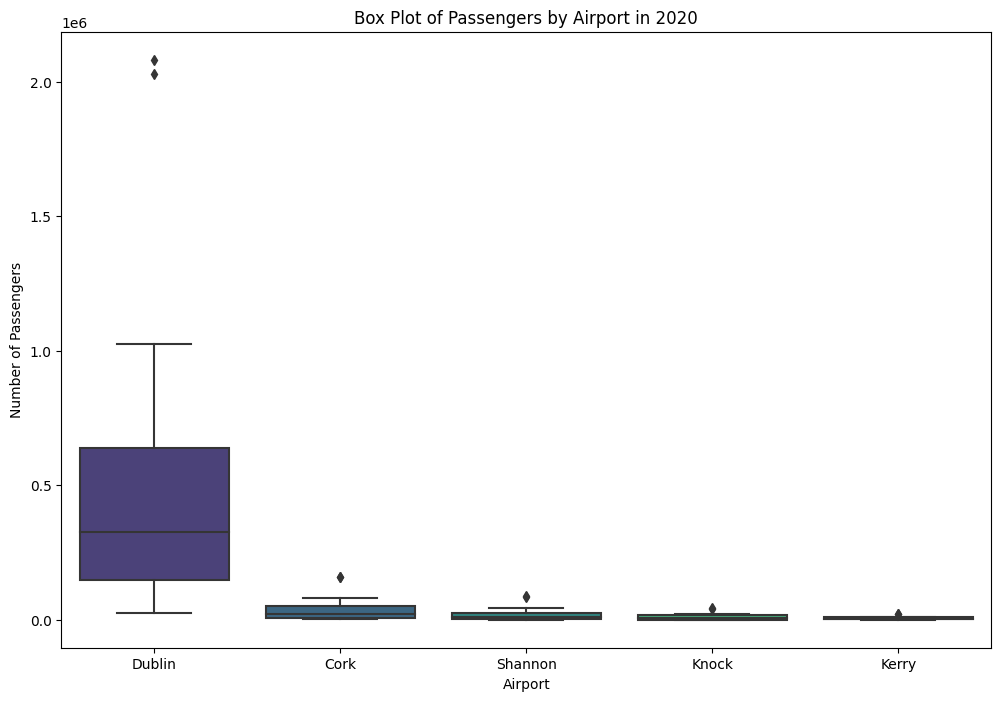

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('flightdataupdated.csv')

data_2020 = df[df['Year'] == 2020]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Airport', y='VALUE', data=data_2020, palette='viridis')
plt.title('Box Plot of Passengers by Airport in 2020')
plt.xlabel('Airport')
plt.ylabel('Number of Passengers')
plt.show()

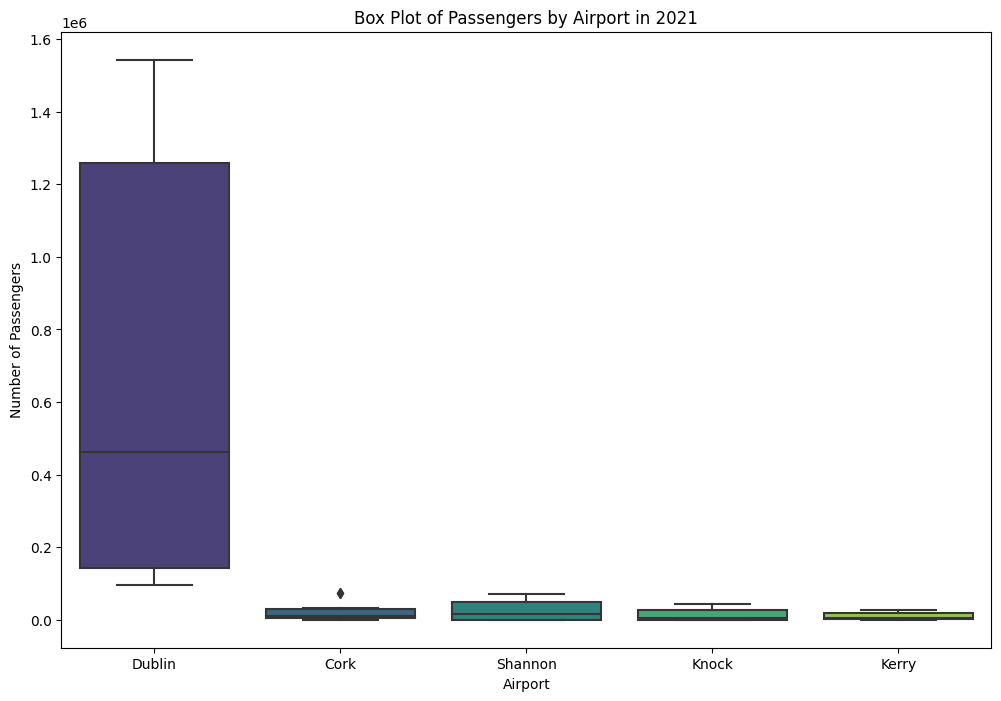

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('flightdataupdated.csv')

data_2021 = df[df['Year'] == 2021]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Airport', y='VALUE', data=data_2021, palette='viridis')
plt.title('Box Plot of Passengers by Airport in 2021')
plt.xlabel('Airport')
plt.ylabel('Number of Passengers')
plt.show()

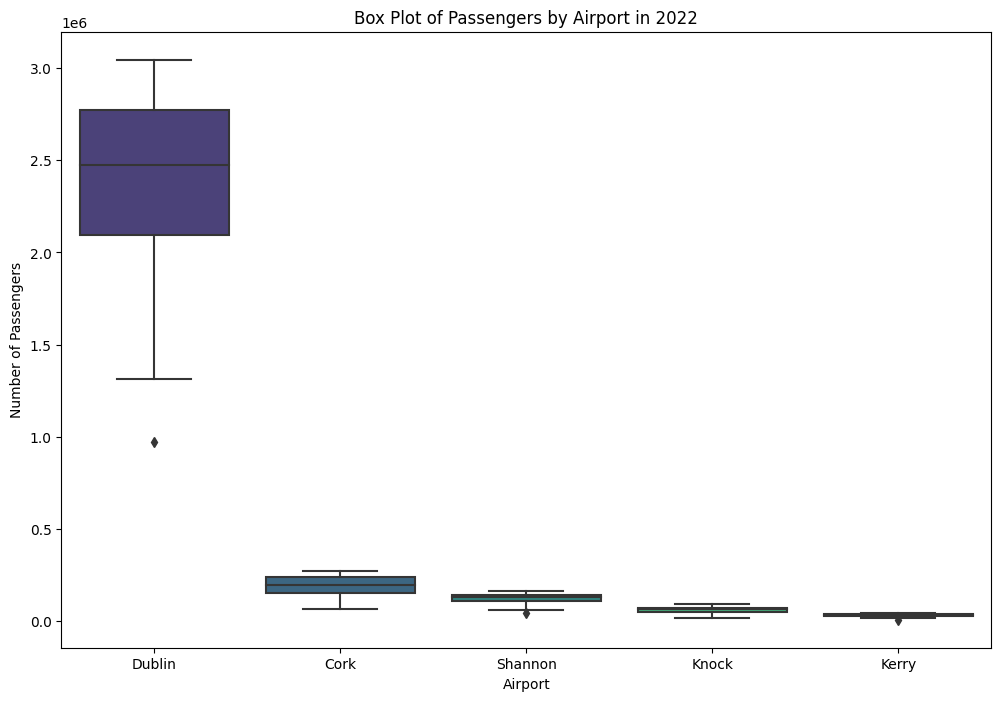

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('flightdataupdated.csv')

data_2022 = df[df['Year'] == 2022]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Airport', y='VALUE', data=data_2022, palette='viridis')
plt.title('Box Plot of Passengers by Airport in 2022')
plt.xlabel('Airport')
plt.ylabel('Number of Passengers')
plt.show()

**X00191019 - Jason O'Connor**

*Hypothesis Testing*

Importing the Required Packages

In [ ]:
import scipy.stats as stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import pandas as pd

Load & Read the Modified Dataset for this Testing

In [ ]:
df =pd.read_csv('FlightDataCorrelationModified.csv')
df.head()

**Using Correlation Testing**

*Pearsons Correlation Coefficient*

**Question:** Is There a Correlation Between the Month of the Year & Amount of Passengers Coming to Ireland?

**Hypothesis:**
H0: There is No Significant Correlation |
H1: There is a Significant Correlation

In [ ]:
stats.pearsonr(df['VALUE'], df['Year'])

For our answer, we got a P Value of 0.39, which is higher than 0.05, we conclude it is H0, as there is no significant correlation between the two sets of data.

**Using the Paired T-Test**

**Question:** Is There a Correlation Between the Month of the Year & Amount of Passengers Coming to Ireland?

**Hypothesis:** H0: There is No Significant Correlation |
H1: There is a Significant Correlation

In [ ]:
ttest_rel(df['Year'], df['VALUE'])

Here, we have a P Value of 4.16, which on face value would seem higher than 0.05, however, we must closely examine the number again.

The actual value ends with 'e-14', which means the number is much smaller than 0.05, so on this test, we would have to say the answer is H1, there seems to be a Significant Correlation between the two values.